In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [3]:
#TotalCharge showing as Object type,convert it to numeric
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [4]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())
print("\n\n List of Unique catergories:\n")

datset_churn_column = list(df.columns)

#Removing numerical columns & CustomerID
datset_churn_column.remove('customerID')
datset_churn_column.remove('SeniorCitizen')
datset_churn_column.remove('tenure')
datset_churn_column.remove('MonthlyCharges')
datset_churn_column.remove('TotalCharges')

# Printing Unique values in each categorical column
for col in datset_churn_column:
    print(col, "-", df[col].unique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   11

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


 List of Unique catergories:

gender - ['Female

Churn
No     5174
Yes    1869
dtype: int64


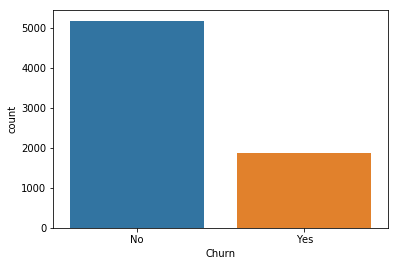

In [260]:
sns.countplot(x="Churn",data=df);
print(df.groupby('Churn').size())

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [5]:
#11 missing values droped
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

In [315]:
#description of numerical values
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000,7032.000,7032.000,7032.000
mean,0.162,32.422,64.798,2283.300
std,0.369,24.545,30.086,2266.771
min,0.000,1.000,18.250,18.800
25%,0.000,9.000,35.588,401.450
50%,0.000,29.000,70.350,1397.475
75%,0.000,55.000,89.862,3794.738
max,1.000,72.000,118.750,8684.800


Univariate Analysis of each numerical Variables


C:\Users\Abhilash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Abhilash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Abhilash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


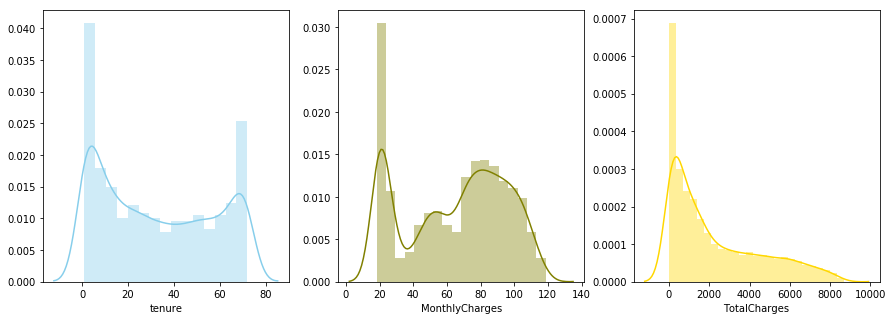

In [268]:
#Univariate Analysis of each numerical Variables'
#Charting the density plot
print('Univariate Analysis of each numerical Variables')
f, axes = plt.subplots(1, 3, figsize=(15,5))
sns.distplot( df["tenure"] , kde=True, rug=False, color="skyblue", ax=axes[0])
sns.distplot( df["MonthlyCharges"] , kde=True, rug=False, color="olive", ax=axes[ 1])
sns.distplot( df["TotalCharges"] , kde=True, rug=False, color="gold", ax=axes[2])



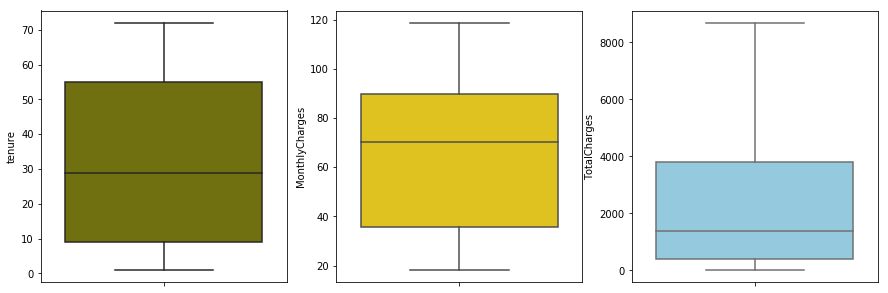

In [269]:
#Oulier checking using Box Plot for Tenure, MonthlyCharges, TotalCharges
#Seems like we dont have outliers from plots
f, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(x=df["tenure"], orient="v", color="olive",ax=axes[0])
sns.boxplot(x=df["MonthlyCharges"], orient="v", color="gold",ax=axes[1])
sns.boxplot(x=df["TotalCharges"] , orient="v", color="skyblue",ax=axes[2])

In [270]:
#Correlation of nnnumerical variables
from pandas import set_option
set_option('precision', 3)
correlations = df.corr(method='pearson')
print(correlations)

                SeniorCitizen  tenure  MonthlyCharges  TotalCharges
SeniorCitizen           1.000   0.016           0.220         0.102
tenure                  0.016   1.000           0.247         0.826
MonthlyCharges          0.220   0.247           1.000         0.651
TotalCharges            0.102   0.826           0.651         1.000


In [271]:
#Checkig Skewness of numerical variables
skew = df.skew()
print(skew)

SeniorCitizen     1.831
tenure            0.238
MonthlyCharges   -0.222
TotalCharges      0.962
dtype: float64


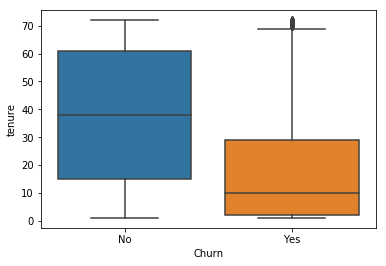

In [272]:
#Churn vs Tenure
sns.boxplot(x = df.Churn, y = df.tenure)
#the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

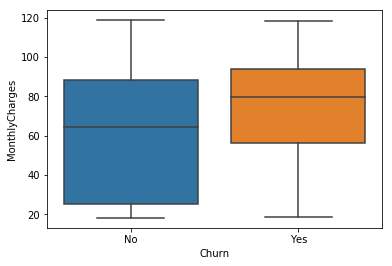

In [273]:
#Churn vs MonthlyCharges
sns.boxplot(x = df.Churn, y = df.MonthlyCharges)
#Higher the monthly charges, more is the possibility of Churn, 
#non churners are paying just over $60, while churners are paying nearly $80 

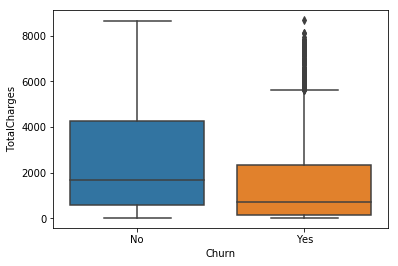

In [274]:
#Churn vs TotalCharges
sns.boxplot(x = df.Churn, y = df.TotalCharges)
#Have to Analyse the graph,but it is not a useful feature

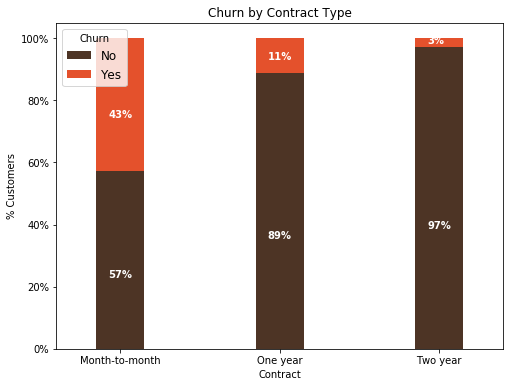

In [275]:
#the customers who have a month to month contract have a very high churn rate.
#Churn by Contract Type

import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512C']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':12},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Contract Type')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

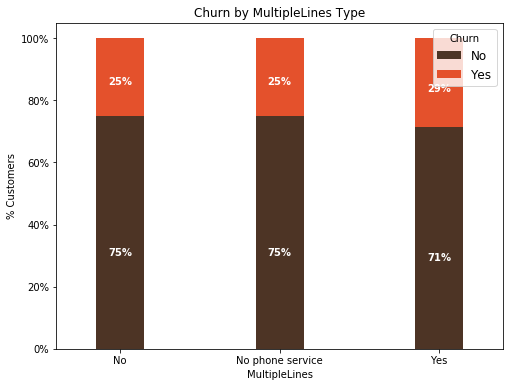

In [276]:
#customers with MultipleLines are churing in higher proportion
import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512C']
contract_churn = df.groupby(['MultipleLines','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':12},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by MultipleLines Type')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

Text(0.5,1,'Churn by Payment Method')

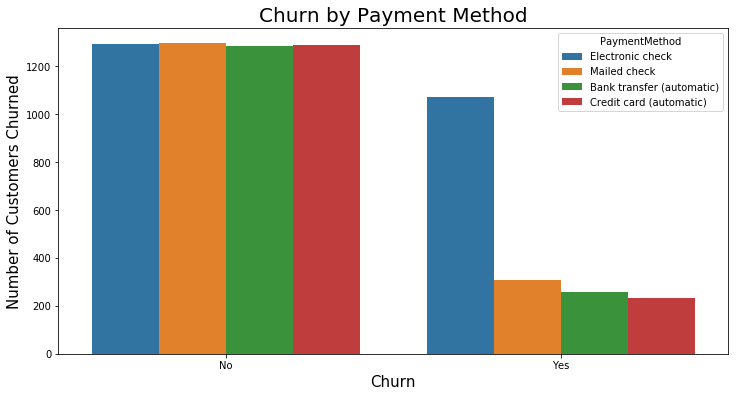

In [277]:
#Customers with Electronic Check as mode of payment are churning in higher proportion
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="PaymentMethod", data=df);
ax.set_ylabel('Number of Customers Churned', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
ax.set_title('Churn by Payment Method', fontsize=20)

C:\Users\Abhilash\Anaconda3\lib\site-packages\pandas\core\frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


Text(0.5,1,'Which Service Customers Churn Higher')

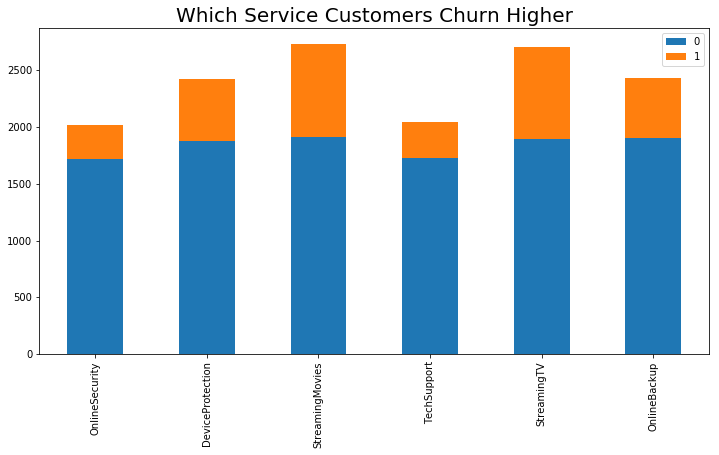

In [278]:
#Customers who are availing Streaming Movies and StreamingTV are churning in higher proportions
#Customer not opting for TechSupport,DeviceProtection have higher chances of leaving
telecom_churn_services = df[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies'
                                       ,'TechSupport', 'StreamingTV', 'OnlineBackup', 'Churn']]
telecom_churn_services.replace(to_replace='Yes', value=1, inplace=True)
telecom_churn_services.replace(to_replace='No', value=0, inplace=True)
telecom_churn_services = telecom_churn_services[telecom_churn_services.OnlineSecurity !='No internet service']             
agg = telecom_churn_services.groupby('Churn', as_index=False)[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']].sum()

ax = agg.set_index('Churn').T.plot(kind='bar', stacked=True, figsize=(12,6))
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')
ax.set_title('Which Service Customers Churn Higher', fontsize=20)

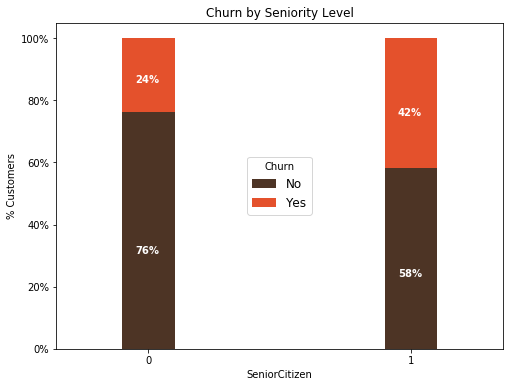

In [279]:
#Churn by Seniority: Senior Citizens have almost double the churn rate than younger population
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':12},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

Text(0.5,1,'Churn By Gender')

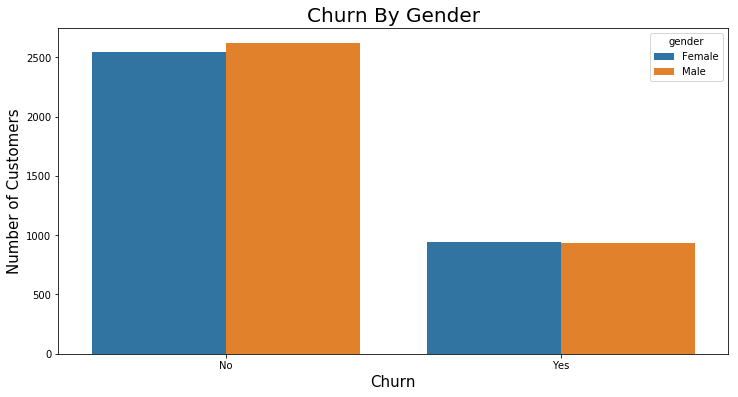

In [280]:
#Gender does not seem to influence Churn significantly
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="gender", data=df);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

ax.set_title('Churn By Gender', fontsize=20)

Text(0.5,1,'Churn By Partner')

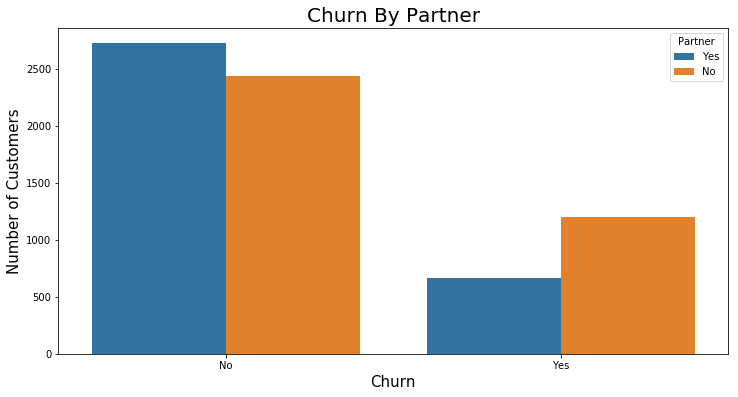

In [281]:
#Customer with partner have lower chance of leaving
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="Partner", data=df);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

ax.set_title('Churn By Partner', fontsize=20)

Text(0.5,1,'Churn By Dependents')

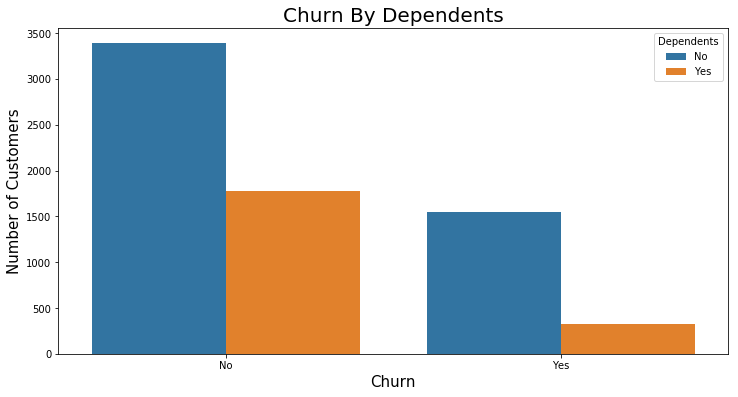

In [282]:
#Customer with Dependents have lower chance of leaving
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="Dependents", data=df);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

ax.set_title('Churn By Dependents', fontsize=20)

Text(0.5,1,'Churn By Internet Service Type')

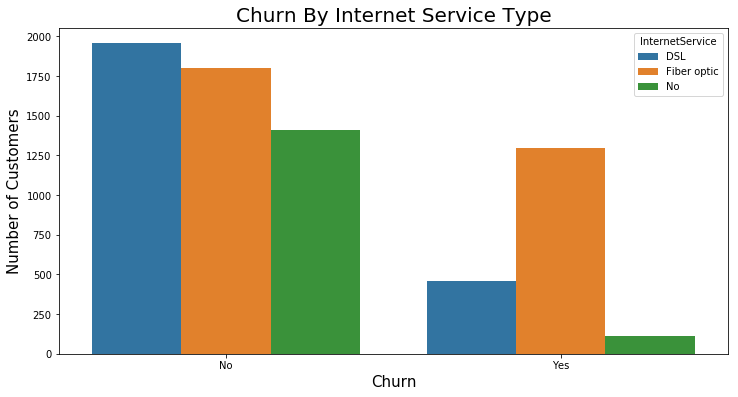

In [283]:
#Customers with Fiber Optic internet service are churning most
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="InternetService", data=df);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
ax.set_title('Churn By Internet Service Type', fontsize=20)

Text(0.5,1,'Churn by paperless Billing')

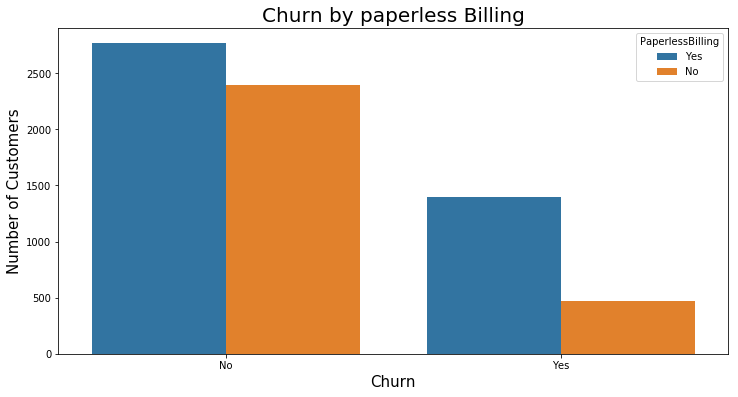

In [284]:
#Customers with paperless billing have higher chances of leaving
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="PaperlessBilling", data=df);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

ax.set_title('Churn by paperless Billing', fontsize=20)

In [305]:
#Bivariate Analysis of Churn vs other input variables
#mapping churn YES/NO to 1/0
df['Churn_Num'] = df['Churn'].map( {'Yes': 1, 'No': 0} ).astype(int)
#df.drop(['Churn_Num'], axis=1, inplace=True) Use this later for dropping Churn_Num
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Num
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


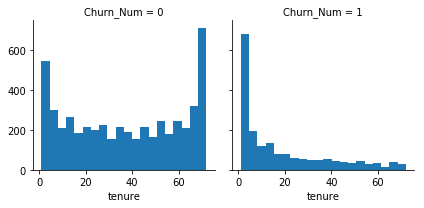

In [287]:
# Plotting Tenure Column with Churn
# Churn_num indicates customer who left the company. 0 indicates customer who stayed.
fighist = sns.FacetGrid(df, col='Churn_Num')
fighist.map(plt.hist, 'tenure', bins=20) 
'''
Observations:
Customer who left the Telco are mostly customers within 1st month (600+) and churn steady declines with time.
If customer can be retained between 10-20 months, there are high chances, customer will stay very long. Churn decreases over time
Customer at 72 month tenure, mostly stayed (Churn=0).
'''

"\nMajority of customers are in 18 to 20 range and they didn't leave\nCustomer Leaving are mostly in the bannd of 75-100 who have opted for multiple services.\n"

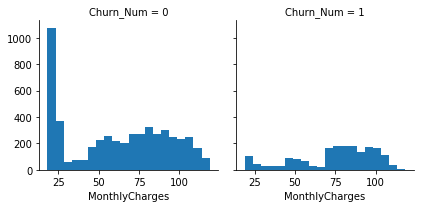

In [288]:
fighist = sns.FacetGrid(df, col='Churn_Num')
fighist.map(plt.hist, 'MonthlyCharges', bins=20)
'''
Majority of customers are in 18 to 20 range and they didn't leave
Customer Leaving are mostly in the bannd of 75-100 who have opted for multiple services.
'''

"\nObservation:\nIt's difficult to conclude anything using this column. Total charges are Tenure * MonthlyCharges . Tenur might me high and\nMonthly charges may be low and vice-versa. Data is positively skewed\n"

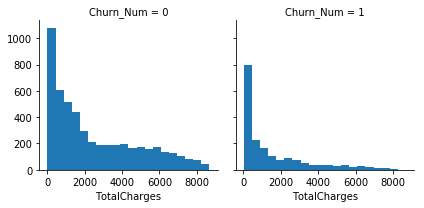

In [289]:
fighist = sns.FacetGrid(df, col='Churn_Num')
fighist.map(plt.hist, 'TotalCharges', bins=20)
'''
Observation:
It's difficult to conclude anything using this column. Total charges are Tenure * MonthlyCharges . Tenur might me high and
Monthly charges may be low and vice-versa. Data is positively skewed
'''

In [306]:
df.drop(['Churn_Num'], axis=1, inplace=True)

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#droping Cusstomer ID as it has no significance in model selection, Drop target variable
#Convert cateegorical values to numerical
df1=df.drop(columns=['customerID'])
df1.drop(['Churn'], axis=1, inplace=True)
data = pd.get_dummies(data=df1)
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [8]:
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [9]:
#Created Numpaay array for data processing
y=df.iloc[:,-1].values
#x=df.iloc[:,1:20].values
y

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [12]:
x=data.iloc[:,:].values

In [13]:
x

array([[  0.  ,   1.  ,  29.85, ...,   0.  ,   1.  ,   0.  ],
       [  0.  ,  34.  ,  56.95, ...,   0.  ,   0.  ,   1.  ],
       [  0.  ,   2.  ,  53.85, ...,   0.  ,   0.  ,   1.  ],
       ...,
       [  0.  ,  11.  ,  29.6 , ...,   0.  ,   1.  ,   0.  ],
       [  1.  ,   4.  ,  74.4 , ...,   0.  ,   0.  ,   1.  ],
       [  0.  ,  66.  , 105.65, ...,   0.  ,   0.  ,   0.  ]])

In [10]:
#transforing output variable to 0/1
from sklearn.preprocessing import  LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [11]:
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [14]:
#Spliting into test and train dataset
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
print('Number of data points in train data:', X_train.shape)
print('Number of data points in test data:', X_test.shape)
print('Number of data points in train data:', y_train.shape)
print('Number of data points in test data:', y_test.shape)

Number of data points in train data: (5625, 45)
Number of data points in test data: (1407, 45)
Number of data points in train data: (5625,)
Number of data points in test data: (1407,)


In [16]:
#Standadised data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
X_test

array([[-0.4397627 , -0.54442123, -0.22069469, ..., -0.01332386,
         0.        , -0.01332386],
       [-0.4397627 ,  1.1241654 ,  1.72202508, ..., -0.01332386,
         0.        , -0.01332386],
       [-0.4397627 , -0.78860463,  0.23670937, ..., -0.01332386,
         0.        , -0.01332386],
       ...,
       [ 2.27395367,  0.96137646,  1.56733934, ..., -0.01332386,
         0.        , -0.01332386],
       [-0.4397627 , -0.58511846, -0.2855629 , ..., -0.01332386,
         0.        , -0.01332386],
       [-0.4397627 , -1.27697145, -0.63318998, ..., -0.01332386,
         0.        , -0.01332386]])

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
y_pred = classifier.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,y_pred)
print("Area Under ROC Curve",logit_roc_auc)

Area Under ROC Curve 0.7244897159954258


In [1]:
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

NameError: name 'roc_curve' is not defined

In [336]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print('recall score = ',recall_score(y_test,y_pred))
print('precision score = ',precision_score(y_test,y_pred))

recall score =  0.5501355013550135
precision score =  0.6590909090909091


In [337]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.85      0.90      0.87      1038
          1       0.66      0.55      0.60       369

avg / total       0.80      0.81      0.80      1407



In [338]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [1]:
cm

NameError: name 'cm' is not defined

In [339]:
def plot_confusion_matrix(classifier, y_test, y_pred_test):
    cm = confusion_matrix(y_test, y_pred_test)
    
    print("\n",classifier,"\n")
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Churn-No','Churn-Yes']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))
    return;


 Logistic Regression 



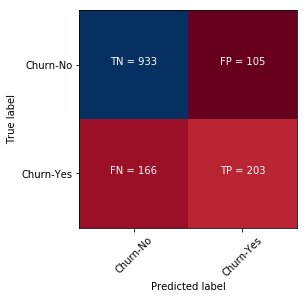

Recall=0.550 
Precision=0.659
F1=0.600


In [340]:
plot_confusion_matrix('Logistic Regression', y_test, y_pred)

In [341]:
from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_prec_rec_curve(classifier, y_test, y_pred_score):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_score)
    average_precision = average_precision_score(y_test, y_pred_score)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()

Average precision-recall score: 0.481


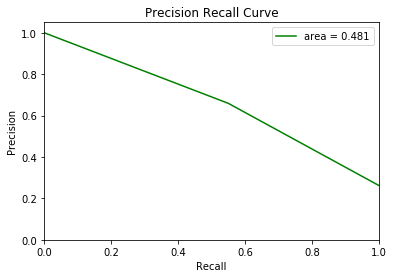

In [342]:
plot_prec_rec_curve('Logistic Regression', y_test, y_pred)

In [343]:
#Checking accuracy with 10 fold cross validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.804


In [370]:
#Checking accuracy with Leave One Out Sampling
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
num_folds = 10
loocv = LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, X_train, y_train, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)

KeyboardInterrupt: 

In [392]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_res, y_res = sm.fit_sample(X_train, y_train)
LogSmote = LogisticRegression(random_state = 0)
LogSmote.fit(x_res, y_res)
y_predSmote = LogSmote.predict(x_res)
print('Accuracy of logistic regression classifier with SMOTE on test set: {:.2f}'.format(LogSmote.score(X_test, y_test)))

C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Accuracy of logistic regression classifier with SMOTE on test set: 0.75


In [390]:
os = SMOTE(random_state=41)
columns =pd.DataFrame(X_train).columns
os_data_X,os_data_y=os.fit_sample(X_train,y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["Churn"])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Count of each class level of oversampled data is ",os_data_y.groupby('Churn').size())

length of oversampled data is  8250
Count of each class level of oversampled data is  Churn
0    4125
1    4125
dtype: int64


In [391]:
X_trains, X_tests, y_trains, y_tests = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)
columns =X_trains.columns
LogSmote = LogisticRegression(random_state = 0)
LogSmote.fit(X_trains, y_trains)
print('Accuracy of logistic regression classifier with SMOTE on test set: {:.2f}'.format(LogSmote.score(X_tests, y_tests)))

C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier with SMOTE on test set: 0.78


In [372]:
# To get the weights of all the variables
#while some have positive relation,some negative.Negative relation means that likeliness of churn decreases with that variable
weights = pd.Series(classifier.coef_[0],index=data.columns.values)
weights.sort_values(ascending = False)

TotalCharges                               0.673
InternetService_Fiber optic                0.309
Contract_Month-to-month                    0.300
PaymentMethod_Electronic check             0.142
StreamingMovies_Yes                        0.132
StreamingTV_Yes                            0.108
TechSupport_No                             0.100
SeniorCitizen                              0.099
OnlineSecurity_No                          0.091
PaperlessBilling_Yes                       0.090
MultipleLines_Yes                          0.082
DeviceProtection_Yes                       0.067
OnlineBackup_No                            0.057
Dependents_No                              0.047
Partner_Yes                                0.010
OnlineBackup_Yes                           0.009
MultipleLines_No phone service             0.007
PhoneService_No                            0.007
gender_Male                                0.006
DeviceProtection_No                        0.002
gender_Female       

In [163]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [164]:
y_pred = classifier.predict(X_test)


 SVM Linear 



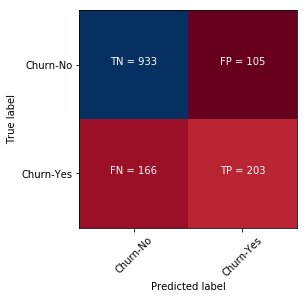

Recall=0.550 
Precision=0.659
F1=0.600
Average precision-recall score: 0.481


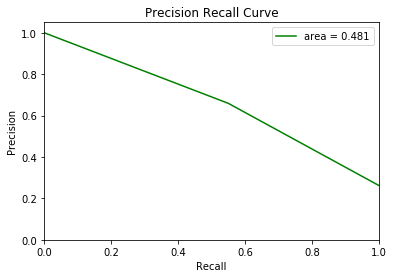

In [371]:
plot_confusion_matrix('SVM Linear', y_test, y_pred)
plot_prec_rec_curve('SVM Linear', y_test, y_pred)

In [359]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [360]:
y_pred = classifier.predict(X_test)


 SVM Polynomial 



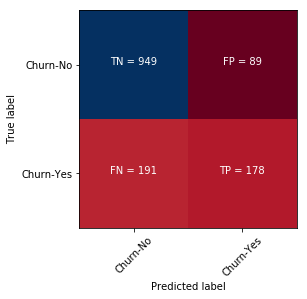

Recall=0.482 
Precision=0.667
F1=0.560
Average precision-recall score: 0.457


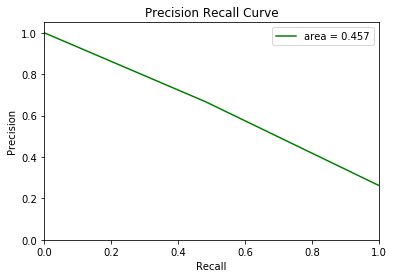

In [361]:
plot_confusion_matrix('SVM Polynomial', y_test, y_pred)
plot_prec_rec_curve('SVM Polynomial', y_test, y_pred)

In [20]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 99)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


 RBF Kernel SVM 



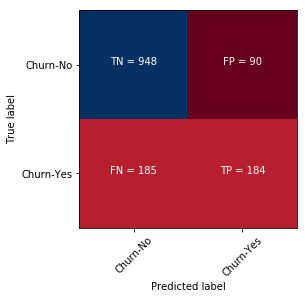

Recall=0.499 
Precision=0.672
F1=0.572
Average precision-recall score: 0.466


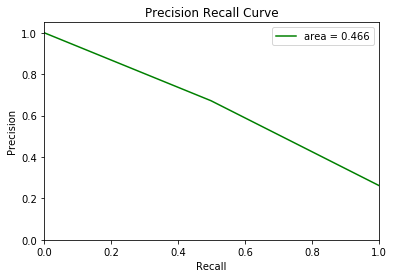

In [167]:
plot_confusion_matrix('RBF Kernel SVM', y_test, y_pred)
plot_prec_rec_curve('RBF Kernel SVM', y_test, y_pred)

In [170]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


 Decesion Tree 



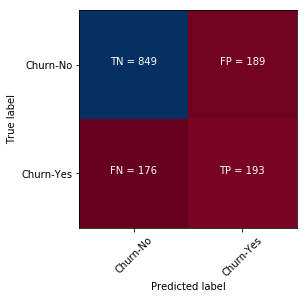

Recall=0.523 
Precision=0.505
F1=0.514
Average precision-recall score: 0.389


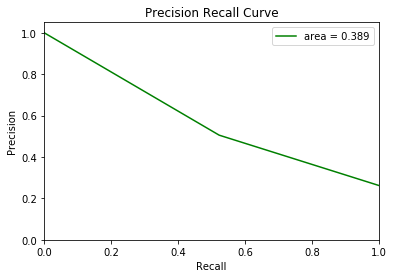

In [171]:
plot_confusion_matrix('Decesion Tree', y_test, y_pred)
plot_prec_rec_curve('Decesion Tree', y_test, y_pred)

In [355]:
from sklearn.ensemble import RandomForestClassifier
randomf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
randomf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = randomf.predict(X_test)



 Random Forest 



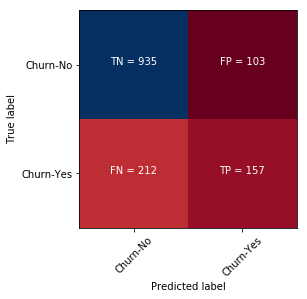

Recall=0.425 
Precision=0.604
F1=0.499
Average precision-recall score: 0.408


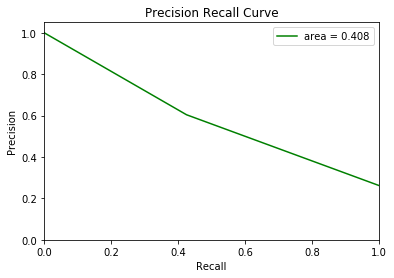

In [356]:
plot_confusion_matrix('Random Forest', y_test, y_pred)
plot_prec_rec_curve('Random Forest', y_test, y_pred)

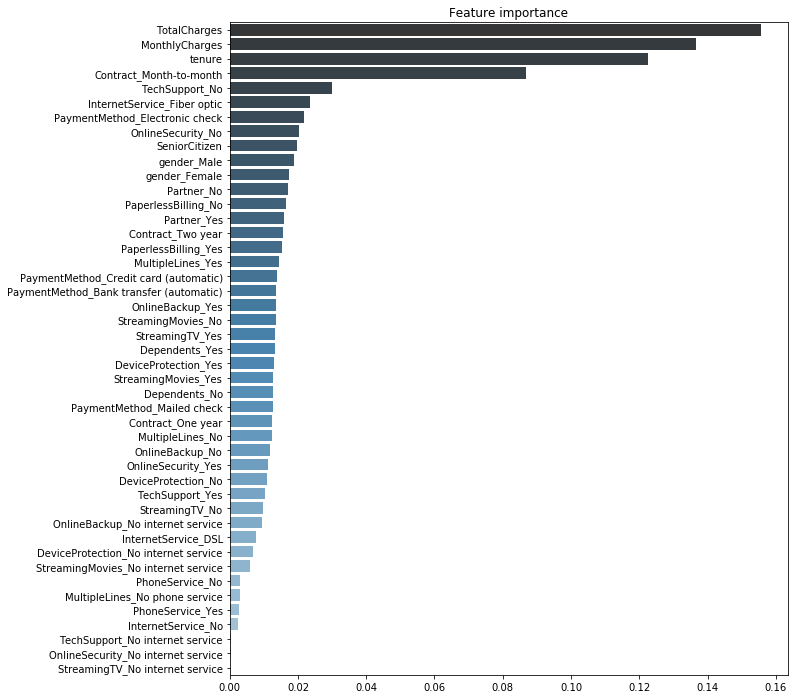

In [358]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# Plot features importances
imp = pd.Series(data=randomf.feature_importances_, index=data.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance wrt random Forest")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [177]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


 Logistic Regression with PCA=2 



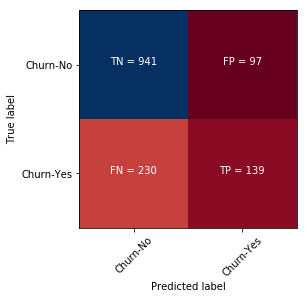

Recall=0.377 
Precision=0.589
F1=0.460
Average precision-recall score: 0.385


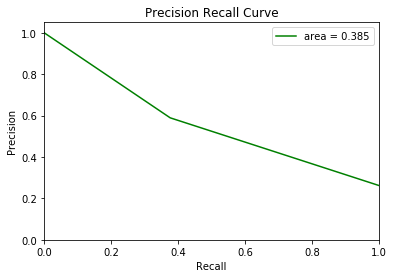

In [179]:
plot_confusion_matrix('Logistic Regression with PCA=2', y_test, y_pred)
plot_prec_rec_curve('Logistic Regression with PCA=2', y_test, y_pred)

In [181]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

0.7607166109365815

In [204]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

NameError: name 'model' is not defined